# Downloading Data

In [ ]:
import scipy.io
import urllib.request
url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
filename = "train_32x32.mat"
urllib.request.urlretrieve(url, filename)

data = scipy.io.loadmat(filename)

X = data['X']
y = data['y']

# Exploratory Data Analysis

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
import numpy as np

X = np.transpose(X, (3, 0, 1, 2))  # Transposing the data to match the dimensions of y
y = y.ravel()
y[y == 10] = 0 # Setting y = 10 to 0 (as 10 represents 0)
print(X.shape)
print(y.shape)

In [ ]:
# Train Test Validation Split
from sklearn.model_selection import train_test_split

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=87)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=1/3, random_state=87)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def class_distribution(y, color, title):
    unique_elements, count = np.unique(y, return_counts=True)
    plt.bar(unique_elements, count, color=color)
    plt.title(title)
    plt.xlabel("Class Type")
    plt.ylabel("Frequency")
    plt.xticks(unique_elements)
    plt.show()

In [ ]:
class_distribution(y_train, 'red', "Training Set")
class_distribution(y_test, 'blue', "Test Set")
class_distribution(y_val, 'green', "Validation Set")

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

indices = [3000, 7000, 12000, 30000, 50000]

for index in indices:
    image = X_train[index]
    label = y_train[index]

    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.show()


In [ ]:
X_train_original = X_train
X_test_original = X_test
X_val_original = X_val

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Date Preprocessing


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split


X_remaining, X_grid_search, y_remaining, y_grid_search = train_test_split(
    X_train, y_train, test_size=2000, random_state=87
)
print(X_grid_search.shape)
print(y_grid_search.shape)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

param_grid = {
    'learning_rate_init': [0.01, 0.1],
    'hidden_layer_sizes': [(10, 5), (25, 25), (50, 25)],
    #'alpha': [0.001, 0.01],
    'batch_size': [32, 64, 128],
    'max_iter': [10, 20, 30],
}

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_grid_search, y_grid_search)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'batch_size': 64, 'hidden_layer_sizes': (25, 25), 'learning_rate_init': 0.01, 'max_iter': 30}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation = logistic, Testing Accuracy = 0.5838110838110838


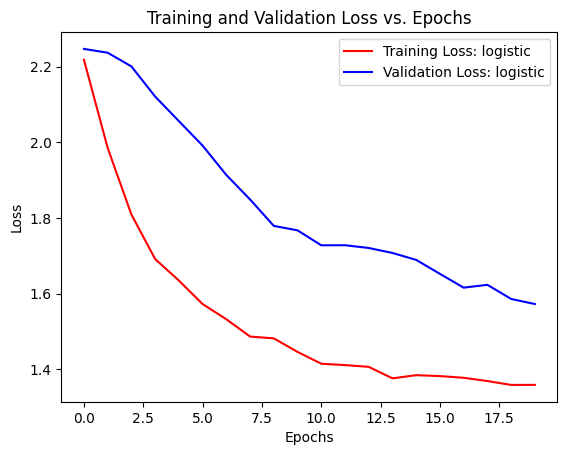

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation = relu, Testing Accuracy = 0.6561561561561562


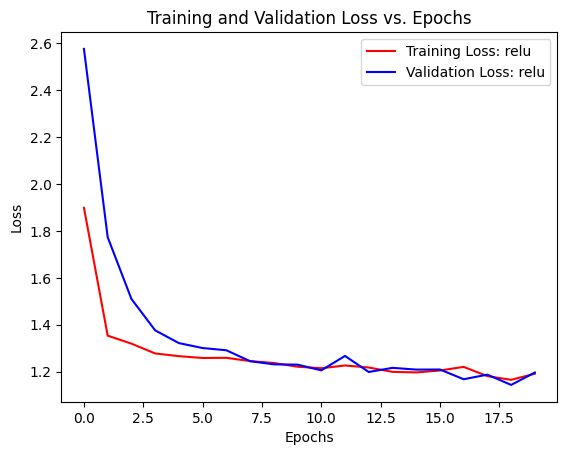

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

best_params = {'batch_size': 64, 'hidden_layer_sizes': (25, 25), 'learning_rate_init': 0.01, 'max_iter': 20}
activation_functions = ['logistic', 'relu', 'tanh', 'identity']
models = []

for activation in activation_functions:
    model = MLPClassifier(activation=activation, **best_params)

    model.fit(X_train, y_train)
    models.append(model)
    plt.plot(model.loss_curve_, label=f'Training Loss: {activation}', color='red')

    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    model = MLPClassifier(activation=activation, **best_params)
    model.fit(X_val, y_val)
    plt.plot(model.loss_curve_, label=f'Validation Loss: {activation}', color='blue')

    print(f'Activation = {activation}, Testing Accuracy = {test_accuracy}')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss vs. Epochs')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

y_pred = models[0].predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mask = y_pred != y_test  # misclassifications
misclassified_indices = np.where(mask)[0]

for index in misclassified_indices[:3]:
    image = X_test_original[index]
    label_true = y_test[index]
    label_pred = y_pred[index]

    plt.imshow(image)
    plt.title(f"True Label: {label_true}, Predicted Label: {label_pred}")
    plt.show()